In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
digits = load_digits()

# Understanding the SkLearn Database

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

The dir() function in python is an inbuilt function used on an object to look at all the properties / attributes and methods of that object, without its values (if any)

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [5]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

The gray() function in pyplot module of matplotlib library is used to set the colormap to “gray”

pyplot.matshow() function is used to represent an array as a matrix in a new figure window

<Figure size 640x480 with 0 Axes>

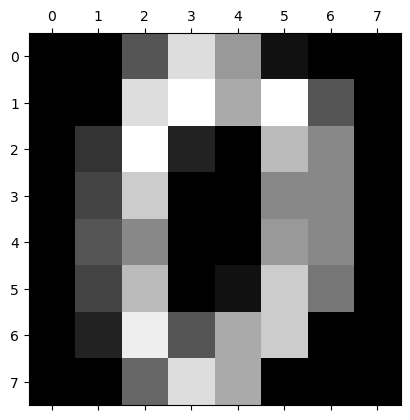

In [6]:
plt.gray()
plt.matshow(digits.images[0])

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [8]:
digits.target_names[0:5]

array([0, 1, 2, 3, 4])

# Training the Model

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [12]:
reg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Model achieved with 97.5% Accuracy

In [13]:
reg.score(X_test,y_test)

0.975

# Random Test

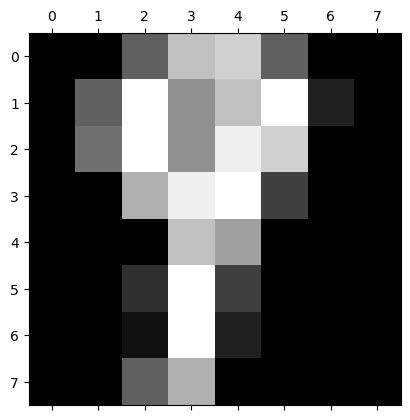

In [14]:
plt.matshow(digits.images[69])

In [15]:
digits.target[69]

9

In [16]:
reg.predict([digits.data[69]])

array([9])

In [17]:
y_predicted = reg.predict(X_test)

# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 35,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  1, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]])

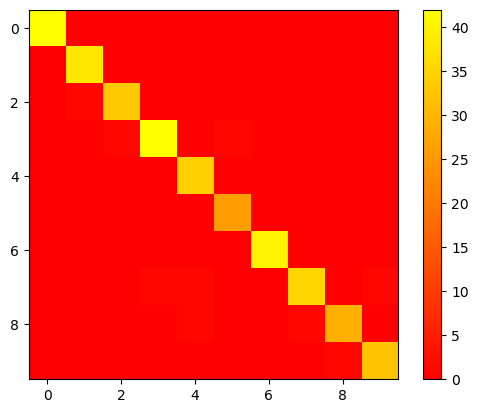

In [19]:
plt.imshow(cm,cmap = 'autumn')
plt.colorbar()

Text(95.72222222222221, 0.5, 'Truth')

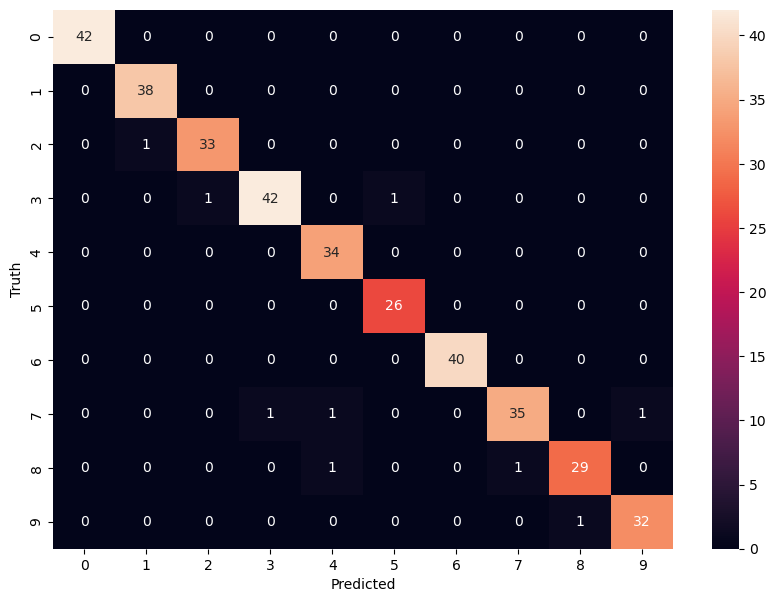

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using SVM (Support Vector Machine)

In [23]:
from sklearn.svm import SVC
model_SVC = SVC()

In [24]:
model_SVC.fit(X_train,y_train)

SVC()

In [25]:
model_SVC.score(X_test,y_test)

0.9833333333333333

SVM Model Achieved an accuracy of 98.3%

# SVM Parameters (Regularization (C),Gamma, Kernel)

In [26]:
model_SVC = SVC(C=10)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.9861111111111112

In [27]:
model_SVC = SVC(C=1)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.9833333333333333

In [28]:
model_SVC = SVC(C=30)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.9861111111111112

A Higher C resulted in 98.61% whereas a lower C resulted in 98.33% accuracy

In [29]:
model_SVC = SVC(gamma = 1)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.07222222222222222

In [30]:
model_SVC = SVC(gamma = 10)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.07222222222222222

In [32]:
model_SVC = SVC(gamma = 1000)
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.07222222222222222

Gamma change had no evident changes in the % accuracy

In [33]:
model_SVC = SVC(kernel = 'linear')
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.975

In [34]:
model_SVC = SVC(kernel = 'rbf')
model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.9833333333333333

Using RBF and Linear as Kernels in SVC, resulted in 97.5% and 98.33% accuracy, respectively.

Thank you!
In case of any errors, please feel free to bring it to my notice.